# Simulating the future covariates

In [191]:
# Load in all the available data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load in the data
df = pd.read_csv(
    '/Users/skyfano/Documents/Masterarbeit/Prediction_of_energy_prices/data/Final_data/final_data_july.csv')
df = df.set_index("Date")
df

,Day_ahead_price (€/MWh),Solar_radiation (W/m2),Wind_speed (m/s),Temperature (°C),Biomass (GWh),Hard_coal (GWh),Hydro (GWh),Lignite (GWh),Natural_gas (GWh),Other (GWh),...,Lag_1_day,Lag_2_days,Lag_3_days,Lag_4_days,Lag_5_days,Lag_6_days,Lag_7_days,Day_of_week,Month,Rolling_mean_7
Date,,,,,,,,,,,,,,,,,,,,,
2012-01-08,26.83,17.54,5.21,3.74,98.605,189.718,48.467,354.178,256.892,52.178,...,32.58,36.26,20.35,32.16,35.03,33.82,18.19,6,1,31.00
2012-01-09,47.91,13.04,4.24,3.80,98.605,344.154,49.054,382.756,282.438,60.752,...,26.83,32.58,36.26,20.35,32.16,35.03,33.82,0,1,33.02
2012-01-10,45.77,28.71,4.30,4.81,98.605,360.126,51.143,334.267,267.311,62.106,...,47.91,26.83,32.58,36.26,20.35,32.16,35.03,1,1,34.55
2012-01-11,47.83,21.58,4.08,5.14,98.605,360.330,50.693,385.000,277.343,60.862,...,45.77,47.91,26.83,32.58,36.26,20.35,32.16,2,1,36.79
2012-01-12,43.10,25.12,6.77,4.98,98.605,306.521,50.732,332.985,266.820,56.922,...,47.83,45.77,47.91,26.83,32.58,36.26,20.35,3,1,40.04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-07-24,66.61,225.04,3.47,17.54,110.007,43.469,85.857,199.246,194.291,54.026,...,79.62,88.75,58.45,59.32,86.47,90.75,76.79,2,7,75.71
2024-07-25,78.34,272.71,2.12,17.85,110.410,50.676,82.632,195.983,209.610,52.963,...,66.61,79.62,88.75,58.45,59.32,86.47,90.75,3,7,73.94
2024-07-26,93.04,172.33,2.60,19.09,110.852,42.333,79.531,205.273,205.773,52.616,...,78.34,66.61,79.62,88.75,58.45,59.32,86.47,4,7,74.88


In [193]:
# Drop the last 10 columns
df = df.drop(df.columns[-10:], axis=1)
df

,Day_ahead_price (€/MWh),Solar_radiation (W/m2),Wind_speed (m/s),Temperature (°C),Biomass (GWh),Hard_coal (GWh),Hydro (GWh),Lignite (GWh),Natural_gas (GWh),Other (GWh),Pumped_storage_generation (GWh),Solar_energy (GWh),Wind_offshore (GWh),Wind_onshore (GWh),Net_total_export_import (GWh),BEV_vehicles,Oil_price (EUR),TTF_gas_price (€/MWh),Nuclear_energy (GWh)
Date,,,,,,,,,,,,,,,,,,,
2012-01-08,26.83,17.54,5.21,3.74,98.605,189.718,48.467,354.178,256.892,52.178,16.006,8.039,3.639,251.722,26.066,6,103.71,21.33,286.206
2012-01-09,47.91,13.04,4.24,3.80,98.605,344.154,49.054,382.756,282.438,60.752,25.507,4.942,2.225,153.948,-59.712,6,103.64,22.45,294.593
2012-01-10,45.77,28.71,4.30,4.81,98.605,360.126,51.143,334.267,267.311,62.106,18.835,17.101,2.892,200.075,-31.384,6,104.22,21.95,293.534
2012-01-11,47.83,21.58,4.08,5.14,98.605,360.330,50.693,385.000,277.343,60.862,18.164,10.254,3.059,211.599,-2.110,6,103.93,21.95,295.340
2012-01-12,43.10,25.12,6.77,4.98,98.605,306.521,50.732,332.985,266.820,56.922,19.129,17.576,6.901,477.412,32.997,6,102.26,22.08,294.394
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-07-24,66.61,225.04,3.47,17.54,110.007,43.469,85.857,199.246,194.291,54.026,20.934,325.285,49.360,179.921,-168.705,992,75.75,32.63,0.000
2024-07-25,78.34,272.71,2.12,17.85,110.410,50.676,82.632,195.983,209.610,52.963,18.766,394.116,51.053,42.885,-194.496,992,76.36,31.70,0.000
2024-07-26,93.04,172.33,2.60,19.09,110.852,42.333,79.531,205.273,205.773,52.616,19.081,256.246,40.449,129.267,-241.786,993,75.21,32.20,0.000


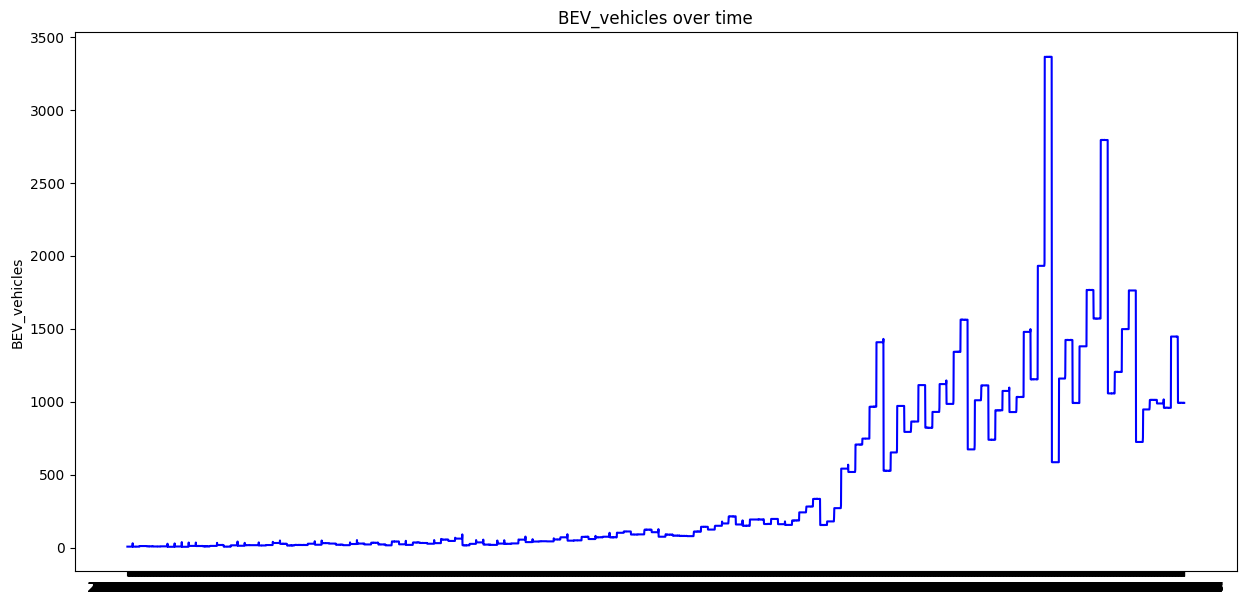

In [194]:
# print the solar_radiation over time
plt.figure(figsize=(15, 7))
plt.plot(df['BEV_vehicles'], color='blue')
plt.title('BEV_vehicles over time')
plt.ylabel('BEV_vehicles')
plt.show()

## Creating predictions for each covariate

In [218]:
# Load and prepare data
def load_and_prepare_data(file_path):
    df = pd.read_csv(file_path)
    df.sort_values('Date', inplace=True)
    df['Date'] = pd.to_datetime(df['Date'])
    return df


df = load_and_prepare_data(
    '/Users/skyfano/Documents/Masterarbeit/Prediction_of_energy_prices/data/Final_data/final_data_july.csv')

# Drop the last 10 columns
df = df.drop(df.columns[-10:], axis=1)

df.columns

Index(['Date', 'Day_ahead_price (€/MWh)', 'Solar_radiation (W/m2)',
       'Wind_speed (m/s)', 'Temperature (°C)', 'Biomass (GWh)',
       'Hard_coal (GWh)', 'Hydro (GWh)', 'Lignite (GWh)', 'Natural_gas (GWh)',
       'Other (GWh)', 'Pumped_storage_generation (GWh)', 'Solar_energy (GWh)',
       'Wind_offshore (GWh)', 'Wind_onshore (GWh)',
       'Net_total_export_import (GWh)', 'BEV_vehicles', 'Oil_price (EUR)',
       'TTF_gas_price (€/MWh)', 'Nuclear_energy (GWh)'],
      dtype='object')

### The next code chunk is used to generate the predictions for most of the covariates expect for the ones that require special treatments which are treated further down below

In [214]:
import plotly.graph_objs as go
import pandas as pd
import numpy as np
import os

TARGET_COLUMNS = ["Solar_energy (GWh)"]

# Calculate mean solar radiation per day with monthly seasonality
# reduce the size of df start at the year 2018 first of january
df_filtered = df[df['Date'] >= '2023-06-01']
df = df_filtered.copy()


def calculate_daily_means_with_seasonality(df, target_column):
    df['Day'] = df['Date'].dt.day
    df['Month'] = df['Date'].dt.month
    daily_means = df.groupby(['Month', 'Day'])[
        target_column].mean().reset_index()

    # Add sinusoidal seasonal variation based on month
    daily_means['Seasonal_Adjustment'] = np.sin(
        2 * np.pi * (daily_means['Month'] - 1) / 12) * 0.1
    daily_means['Adjusted_Value'] = daily_means[target_column] * \
        (1 + daily_means['Seasonal_Adjustment'])
    return daily_means

# Generate future data with minimal variability


def generate_future_data(daily_means, start_date, end_date, seed=42, noise_level=0.2):
    np.random.seed(seed)
    future_dates = pd.date_range(start=start_date, end=end_date)
    future_df = pd.DataFrame({'Date': future_dates})
    future_df['Month'] = future_df['Date'].dt.month
    future_df['Day'] = future_df['Date'].dt.day

    # Merge future dates with daily means
    future_df = future_df.merge(daily_means[['Month', 'Day', 'Adjusted_Value']], on=[
                                'Month', 'Day'], how='left')

    future_df['Forecast'] = future_df['Adjusted_Value'] * \
        (1 + np.random.normal(0, noise_level, size=len(future_df)))

    return future_df[['Date', 'Forecast']]

# Plot the data for each target column separately and save the plot


def plot_and_save_data(original_df, future_dfs, target_columns, output_dir="forecasted_plots"):
    # Create output directory if it doesn't exist
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

    for i, target_column in enumerate(target_columns):
        future_df = future_dfs[i]

        # Ensure future data column matches TARGET_COLUMN
        future_df.rename(columns={'Forecast': target_column}, inplace=True)

        # Combine the original and future datasets
        combined_df = pd.concat([original_df[['Date', target_column]], future_df[[
                                'Date', target_column]]], ignore_index=True)

        # Plot historical and forecast data for the current column
        fig = go.Figure()

        # Plot historical data
        fig.add_trace(go.Scatter(
            x=original_df['Date'],
            y=original_df[target_column],
            mode='lines',
            name=f"{target_column} (Historical)",
            line=dict(color='blue', width=1)
        ))

        # Plot future data
        fig.add_trace(go.Scatter(
            x=future_df['Date'],
            y=future_df[target_column],
            mode='lines',
            name=f"{target_column} (Forecast)",
            line=dict(color='darkred', width=1)
        ))

        # Add vertical line indicating the end of the original data
        original_end_date = original_df['Date'].max()
        fig.add_vline(x=original_end_date, line=dict(
            color='darkgreen', dash='dash'), name='End of Original Data')

        # Update layout for each plot
        fig.update_layout(
            title=f"{target_column} Over Time (Historical and Forecast)",
            xaxis_title="Date",
            yaxis_title=target_column,
            legend=dict(yanchor="top", y=0.99, xanchor="left", x=0.01),
            template='plotly'
        )

        # Save the figure as a PNG file
        plot_filename = os.path.join(
            output_dir, f"{target_column.replace(' ', '_').replace('/', '_')}_forecast_plot.png")
        fig.write_image(plot_filename)
        fig.show()
        print(f"Saved plot for {target_column} to {plot_filename}")

# Save the forecasted future data for each target column into separate CSV files


def save_forecast_to_csv(future_dfs, target_columns, output_dir="forecasted_data"):
    # Create the output directory if it doesn't exist
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

    for i, target_column in enumerate(target_columns):
        # Prepare the filename and full path
        file_name = f"{target_column.replace(' ', '_').replace('/', '_')}_forecast.csv"
        file_path = os.path.join(output_dir, file_name)

        # Save the future dataframe for the target column to CSV
        future_df = future_dfs[i]
        future_df.rename(columns={'Forecast': target_column}, inplace=True)
        future_df.to_csv(file_path, index=False)

        print(f"Saved forecasted data for {target_column} to {file_path}")


# Global configuration
NOISE_LEVEL = 0.1
TOTAL_PREDICTION_LENGTH = 730

# Generate daily means with seasonality and future data for each column
future_dfs = []
for target_column in TARGET_COLUMNS:
    daily_means = calculate_daily_means_with_seasonality(df, target_column)
    future_df = generate_future_data(
        daily_means, start_date='2024-07-29', end_date='2026-12-31', seed=42, noise_level=NOISE_LEVEL)
    future_dfs.append(future_df)

# Save forecasted data to CSV files
save_forecast_to_csv(future_dfs, TARGET_COLUMNS)

# Plot the combined data for each target column and save the plot
plot_and_save_data(df, future_dfs, TARGET_COLUMNS)

Saved forecasted data for Solar_energy (GWh) to forecasted_data/Solar_energy_(GWh)_forecast.csv


Saved plot for Solar_energy (GWh) to forecasted_plots/Solar_energy_(GWh)_forecast_plot.png


# Solar energy

In [223]:
import plotly.graph_objs as go
import pandas as pd
import numpy as np
import os

TARGET_COLUMNS = ["Solar_energy (GWh)"]

# Calculate mean solar radiation per day with monthly seasonality
# reduce the size of df start at the year 2018 first of january
df_filtered = df[df['Date'] >= '2022-07-01']
df = df_filtered.copy()


def calculate_daily_means_with_seasonality(df, target_column):
    df['Day'] = df['Date'].dt.day
    df['Month'] = df['Date'].dt.month
    daily_means = df.groupby(['Month', 'Day'])[
        target_column].mean().reset_index()

    # Add sinusoidal seasonal variation based on month
    daily_means['Seasonal_Adjustment'] = np.sin(
        2 * np.pi * (daily_means['Month'] - 1) / 12) * 0.1
    daily_means['Adjusted_Value'] = daily_means[target_column] * \
        (1 + daily_means['Seasonal_Adjustment'])
    return daily_means

# Generate future data with minimal variability and multiplicator adjustments


def generate_future_data_with_multiplicators(df, daily_means, start_date, end_date, noise_level=0.2,
                                             multiplicators=None, use_last_years=1, seed=42):
    np.random.seed(seed)
    future_dates = pd.date_range(start=start_date, end=end_date)
    future_df = pd.DataFrame({'Date': future_dates})
    future_df['Month'] = future_df['Date'].dt.month
    future_df['Day'] = future_df['Date'].dt.day

    # Option to use more than the last year for prediction
    recent_data_start_date = df['Date'].max(
    ) - pd.DateOffset(years=use_last_years)
    recent_data = df[df['Date'] >= recent_data_start_date]

    # Merge future dates with daily means
    future_df = future_df.merge(daily_means[['Month', 'Day', 'Adjusted_Value']], on=[
                                'Month', 'Day'], how='left')

    # Apply multiplicators per year period
    if multiplicators:
        for start, end, multiplier in multiplicators:
            mask = (future_df['Date'] >= start) & (future_df['Date'] <= end)
            future_df.loc[mask, 'Adjusted_Value'] *= multiplier

    future_df['Forecast'] = future_df['Adjusted_Value'] * \
        (1 + np.random.normal(0, noise_level, size=len(future_df)))
    return future_df[['Date', 'Forecast']]

# Plot the data for each target column separately and save the plot


def plot_and_save_data(original_df, future_dfs, target_columns, output_dir="forecasted_plots"):
    # Create output directory if it doesn't exist
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

    for i, target_column in enumerate(target_columns):
        future_df = future_dfs[i]

        # Ensure future data column matches TARGET_COLUMN
        future_df.rename(columns={'Forecast': target_column}, inplace=True)

        # Combine the original and future datasets
        combined_df = pd.concat([original_df[['Date', target_column]], future_df[[
                                'Date', target_column]]], ignore_index=True)

        # Plot historical and forecast data for the current column
        fig = go.Figure()

        # Plot historical data
        fig.add_trace(go.Scatter(
            x=original_df['Date'],
            y=original_df[target_column],
            mode='lines',
            name=f"{target_column} (Historical)",
            line=dict(color='blue', width=1)
        ))

        # Plot future data
        fig.add_trace(go.Scatter(
            x=future_df['Date'],
            y=future_df[target_column],
            mode='lines',
            name=f"{target_column} (Forecast)",
            line=dict(color='darkred', width=1)
        ))

        # Add vertical line indicating the end of the original data
        original_end_date = original_df['Date'].max()
        fig.add_vline(x=original_end_date, line=dict(
            color='darkgreen', dash='dash'), name='End of Original Data')

        # Update layout for each plot
        fig.update_layout(
            title=f"{target_column} Over Time (Historical and Forecast)",
            xaxis_title="Date",
            yaxis_title=target_column,
            legend=dict(yanchor="top", y=0.99, xanchor="left", x=0.01),
            template='plotly'
        )

        # Save the figure as a PNG file
        plot_filename = os.path.join(
            output_dir, f"{target_column.replace(' ', '_').replace('/', '_')}_forecast_plot.png")
        fig.write_image(plot_filename)
        fig.show()
        print(f"Saved plot for {target_column} to {plot_filename}")

# Save the forecasted future data for each target column into separate CSV files


def save_forecast_to_csv(future_dfs, target_columns, output_dir="forecasted_data"):
    # Create the output directory if it doesn't exist
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

    for i, target_column in enumerate(target_columns):
        # Prepare the filename and full path
        file_name = f"{target_column.replace(' ', '_').replace('/', '_')}_forecast.csv"
        file_path = os.path.join(output_dir, file_name)

        # Save the future dataframe for the target column to CSV
        future_df = future_dfs[i]
        future_df.rename(columns={'Forecast': target_column}, inplace=True)
        future_df.to_csv(file_path, index=False)

        print(f"Saved forecasted data for {target_column} to {file_path}")


# Global configuration
NOISE_LEVEL = 0.05
TOTAL_PREDICTION_LENGTH = 730
MULTIPLICATORS = [
    ('2024-07-29', '2024-12-31', 1.22),
    ('2025-01-01', '2025-12-31', 1.18),
    ('2026-01-01', '2026-12-31', 1.36)
]

# Generate daily means with seasonality and future data for each column
future_dfs = []
for target_column in TARGET_COLUMNS:
    daily_means = calculate_daily_means_with_seasonality(df, target_column)
    future_df = generate_future_data_with_multiplicators(
        df, daily_means, start_date='2024-07-29', end_date='2026-12-31', noise_level=NOISE_LEVEL,
        multiplicators=MULTIPLICATORS, use_last_years=1, seed=42)
    future_dfs.append(future_df)

# Save forecasted data to CSV files
save_forecast_to_csv(future_dfs, TARGET_COLUMNS)

# Plot the combined data for each target column and save the plot
plot_and_save_data(df, future_dfs, TARGET_COLUMNS)

Saved forecasted data for Solar_energy (GWh) to forecasted_data/Solar_energy_(GWh)_forecast.csv


Saved plot for Solar_energy (GWh) to forecasted_plots/Solar_energy_(GWh)_forecast_plot.png


### Wind Offshore

In [251]:
import plotly.graph_objs as go
import pandas as pd
import numpy as np
import os

TARGET_COLUMNS = ["Wind_offshore (GWh)"]

df = load_and_prepare_data(
    '/Users/skyfano/Documents/Masterarbeit/Prediction_of_energy_prices/data/Final_data/final_data_july.csv')

# Drop the last 10 columns
df = df.drop(df.columns[-10:], axis=1)

# Calculate mean solar radiation per day with monthly seasonality
# reduce the size of df start at the year 2018 first of january
df_filtered = df[df['Date'] >= '2022-07-01']
df = df_filtered.copy()


def calculate_daily_means_with_seasonality(df, target_column):
    df['Day'] = df['Date'].dt.day
    df['Month'] = df['Date'].dt.month
    daily_means = df.groupby(['Month', 'Day'])[
        target_column].mean().reset_index()

    # Add sinusoidal seasonal variation based on month
    daily_means['Seasonal_Adjustment'] = np.sin(
        2 * np.pi * (daily_means['Month'] - 1) / 12) * 0.1
    daily_means['Adjusted_Value'] = daily_means[target_column] * \
        (1 + daily_means['Seasonal_Adjustment'])
    return daily_means

# Generate future data with minimal variability and multiplicator adjustments


def generate_future_data_with_multiplicators(df, daily_means, start_date, end_date, noise_level=0.2,
                                             multiplicators=None, use_last_years=1, seed=42):
    np.random.seed(seed)
    future_dates = pd.date_range(start=start_date, end=end_date)
    future_df = pd.DataFrame({'Date': future_dates})
    future_df['Month'] = future_df['Date'].dt.month
    future_df['Day'] = future_df['Date'].dt.day

    # Option to use more than the last year for prediction
    recent_data_start_date = df['Date'].max(
    ) - pd.DateOffset(years=use_last_years)
    recent_data = df[df['Date'] >= recent_data_start_date]

    # Merge future dates with daily means
    future_df = future_df.merge(daily_means[['Month', 'Day', 'Adjusted_Value']], on=[
                                'Month', 'Day'], how='left')

    # Apply multiplicators per year period
    if multiplicators:
        for start, end, multiplier in multiplicators:
            mask = (future_df['Date'] >= start) & (future_df['Date'] <= end)
            future_df.loc[mask, 'Adjusted_Value'] *= multiplier

    future_df['Forecast'] = future_df['Adjusted_Value'] * \
        (1 + np.random.normal(0, noise_level, size=len(future_df)))
    return future_df[['Date', 'Forecast']]

# Plot the data for each target column separately and save the plot


def plot_and_save_data(original_df, future_dfs, target_columns, output_dir="forecasted_plots"):
    # Create output directory if it doesn't exist
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

    for i, target_column in enumerate(target_columns):
        future_df = future_dfs[i]

        # Ensure future data column matches TARGET_COLUMN
        future_df.rename(columns={'Forecast': target_column}, inplace=True)

        # Combine the original and future datasets
        combined_df = pd.concat([original_df[['Date', target_column]], future_df[[
                                'Date', target_column]]], ignore_index=True)

        # Plot historical and forecast data for the current column
        fig = go.Figure()

        # Plot historical data
        fig.add_trace(go.Scatter(
            x=original_df['Date'],
            y=original_df[target_column],
            mode='lines',
            name=f"{target_column} (Historical)",
            line=dict(color='blue', width=1)
        ))

        # Plot future data
        fig.add_trace(go.Scatter(
            x=future_df['Date'],
            y=future_df[target_column],
            mode='lines',
            name=f"{target_column} (Forecast)",
            line=dict(color='darkred', width=1)
        ))

        # Add vertical line indicating the end of the original data
        original_end_date = original_df['Date'].max()
        fig.add_vline(x=original_end_date, line=dict(
            color='darkgreen', dash='dash'), name='End of Original Data')

        # Update layout for each plot
        fig.update_layout(
            title=f"{target_column} Over Time (Historical and Forecast)",
            xaxis_title="Date",
            yaxis_title=target_column,
            legend=dict(yanchor="top", y=0.99, xanchor="left", x=0.01),
            template='plotly'
        )

        # Save the figure as a PNG file
        plot_filename = os.path.join(
            output_dir, f"{target_column.replace(' ', '_').replace('/', '_')}_forecast_plot.png")
        fig.write_image(plot_filename)
        fig.show()
        print(f"Saved plot for {target_column} to {plot_filename}")

# Save the forecasted future data for each target column into separate CSV files


def save_forecast_to_csv(future_dfs, target_columns, output_dir="forecasted_data"):
    # Create the output directory if it doesn't exist
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

    for i, target_column in enumerate(target_columns):
        # Prepare the filename and full path
        file_name = f"{target_column.replace(' ', '_').replace('/', '_')}_forecast.csv"
        file_path = os.path.join(output_dir, file_name)

        # Save the future dataframe for the target column to CSV
        future_df = future_dfs[i]
        future_df.rename(columns={'Forecast': target_column}, inplace=True)
        future_df.to_csv(file_path, index=False)

        print(f"Saved forecasted data for {target_column} to {file_path}")


# Global configuration
NOISE_LEVEL = 0.05
TOTAL_PREDICTION_LENGTH = 730
MULTIPLICATORS = [
    ('2024-07-29', '2024-12-31', 1.02),
    ('2025-01-01', '2025-12-31', 1.22),
    ('2026-01-01', '2026-12-31', 1.32)
]

# Generate daily means with seasonality and future data for each column
future_dfs = []
for target_column in TARGET_COLUMNS:
    daily_means = calculate_daily_means_with_seasonality(df, target_column)
    future_df = generate_future_data_with_multiplicators(
        df, daily_means, start_date='2024-07-29', end_date='2026-12-31', noise_level=NOISE_LEVEL,
        multiplicators=MULTIPLICATORS, use_last_years=1, seed=42)
    future_dfs.append(future_df)

# Save forecasted data to CSV files
save_forecast_to_csv(future_dfs, TARGET_COLUMNS)

# Plot the combined data for each target column and save the plot
plot_and_save_data(df, future_dfs, TARGET_COLUMNS)

Saved forecasted data for Wind_offshore (GWh) to forecasted_data/Wind_offshore_(GWh)_forecast.csv


Saved plot for Wind_offshore (GWh) to forecasted_plots/Wind_offshore_(GWh)_forecast_plot.png


### Wind_onshore

In [250]:
import plotly.graph_objs as go
import pandas as pd
import numpy as np
import os

TARGET_COLUMNS = ["Wind_onshore (GWh)"]

df = load_and_prepare_data(
    '/Users/skyfano/Documents/Masterarbeit/Prediction_of_energy_prices/data/Final_data/final_data_july.csv')

# Drop the last 10 columns
df = df.drop(df.columns[-10:], axis=1)

# Calculate mean solar radiation per day with monthly seasonality
# reduce the size of df start at the year 2018 first of january
df_filtered = df[df['Date'] >= '2022-07-01']
df = df_filtered.copy()


def calculate_daily_means_with_seasonality(df, target_column):
    df['Day'] = df['Date'].dt.day
    df['Month'] = df['Date'].dt.month
    daily_means = df.groupby(['Month', 'Day'])[
        target_column].mean().reset_index()

    # Add sinusoidal seasonal variation based on month
    daily_means['Seasonal_Adjustment'] = np.sin(
        2 * np.pi * (daily_means['Month'] - 1) / 12) * 0.1
    daily_means['Adjusted_Value'] = daily_means[target_column] * \
        (1 + daily_means['Seasonal_Adjustment'])
    return daily_means

# Generate future data with minimal variability and multiplicator adjustments


def generate_future_data_with_multiplicators(df, daily_means, start_date, end_date, noise_level=0.2,
                                             multiplicators=None, use_last_years=1, seed=42):
    np.random.seed(seed)
    future_dates = pd.date_range(start=start_date, end=end_date)
    future_df = pd.DataFrame({'Date': future_dates})
    future_df['Month'] = future_df['Date'].dt.month
    future_df['Day'] = future_df['Date'].dt.day

    # Option to use more than the last year for prediction
    recent_data_start_date = df['Date'].max(
    ) - pd.DateOffset(years=use_last_years)
    recent_data = df[df['Date'] >= recent_data_start_date]

    # Merge future dates with daily means
    future_df = future_df.merge(daily_means[['Month', 'Day', 'Adjusted_Value']], on=[
                                'Month', 'Day'], how='left')

    # Apply multiplicators per year period
    if multiplicators:
        for start, end, multiplier in multiplicators:
            mask = (future_df['Date'] >= start) & (future_df['Date'] <= end)
            future_df.loc[mask, 'Adjusted_Value'] *= multiplier

    future_df['Forecast'] = future_df['Adjusted_Value'] * \
        (1 + np.random.normal(0, noise_level, size=len(future_df)))
    return future_df[['Date', 'Forecast']]

# Plot the data for each target column separately and save the plot


def plot_and_save_data(original_df, future_dfs, target_columns, output_dir="forecasted_plots"):
    # Create output directory if it doesn't exist
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

    for i, target_column in enumerate(target_columns):
        future_df = future_dfs[i]

        # Ensure future data column matches TARGET_COLUMN
        future_df.rename(columns={'Forecast': target_column}, inplace=True)

        # Combine the original and future datasets
        combined_df = pd.concat([original_df[['Date', target_column]], future_df[[
                                'Date', target_column]]], ignore_index=True)

        # Plot historical and forecast data for the current column
        fig = go.Figure()

        # Plot historical data
        fig.add_trace(go.Scatter(
            x=original_df['Date'],
            y=original_df[target_column],
            mode='lines',
            name=f"{target_column} (Historical)",
            line=dict(color='blue', width=1)
        ))

        # Plot future data
        fig.add_trace(go.Scatter(
            x=future_df['Date'],
            y=future_df[target_column],
            mode='lines',
            name=f"{target_column} (Forecast)",
            line=dict(color='darkred', width=1)
        ))

        # Add vertical line indicating the end of the original data
        original_end_date = original_df['Date'].max()
        fig.add_vline(x=original_end_date, line=dict(
            color='darkgreen', dash='dash'), name='End of Original Data')

        # Update layout for each plot
        fig.update_layout(
            title=f"{target_column} Over Time (Historical and Forecast)",
            xaxis_title="Date",
            yaxis_title=target_column,
            legend=dict(yanchor="top", y=0.99, xanchor="left", x=0.01),
            template='plotly'
        )

        # Save the figure as a PNG file
        plot_filename = os.path.join(
            output_dir, f"{target_column.replace(' ', '_').replace('/', '_')}_forecast_plot.png")
        fig.write_image(plot_filename)
        fig.show()
        print(f"Saved plot for {target_column} to {plot_filename}")

# Save the forecasted future data for each target column into separate CSV files


def save_forecast_to_csv(future_dfs, target_columns, output_dir="forecasted_data"):
    # Create the output directory if it doesn't exist
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

    for i, target_column in enumerate(target_columns):
        # Prepare the filename and full path
        file_name = f"{target_column.replace(' ', '_').replace('/', '_')}_forecast.csv"
        file_path = os.path.join(output_dir, file_name)

        # Save the future dataframe for the target column to CSV
        future_df = future_dfs[i]
        future_df.rename(columns={'Forecast': target_column}, inplace=True)
        future_df.to_csv(file_path, index=False)

        print(f"Saved forecasted data for {target_column} to {file_path}")


# Global configuration
NOISE_LEVEL = 0.15
TOTAL_PREDICTION_LENGTH = 730
MULTIPLICATORS = [
    ('2024-07-29', '2024-12-31', 1.03),
    ('2025-01-01', '2025-12-31', 1.18),
    ('2026-01-01', '2026-12-31', 1.29)
]

# Generate daily means with seasonality and future data for each column
future_dfs = []
for target_column in TARGET_COLUMNS:
    daily_means = calculate_daily_means_with_seasonality(df, target_column)
    future_df = generate_future_data_with_multiplicators(
        df, daily_means, start_date='2024-07-29', end_date='2026-12-31', noise_level=NOISE_LEVEL,
        multiplicators=MULTIPLICATORS, use_last_years=1, seed=42)
    future_dfs.append(future_df)

# Save forecasted data to CSV files
save_forecast_to_csv(future_dfs, TARGET_COLUMNS)

# Plot the combined data for each target column and save the plot
plot_and_save_data(df, future_dfs, TARGET_COLUMNS)

Saved forecasted data for Wind_onshore (GWh) to forecasted_data/Wind_onshore_(GWh)_forecast.csv


Saved plot for Wind_onshore (GWh) to forecasted_plots/Wind_onshore_(GWh)_forecast_plot.png


## Lignite


In [240]:
import plotly.graph_objs as go
import pandas as pd
import numpy as np
import os

TARGET_COLUMNS = ["Lignite (GWh)"]

df = load_and_prepare_data(
    '/Users/skyfano/Documents/Masterarbeit/Prediction_of_energy_prices/data/Final_data/final_data_july.csv')

# Drop the last 10 columns
df = df.drop(df.columns[-10:], axis=1)

# Calculate mean solar radiation per day with monthly seasonality
# reduce the size of df start at the year 2018 first of january
df_filtered = df[df['Date'] >= '2022-07-01']
df = df_filtered.copy()


def calculate_daily_means_with_seasonality(df, target_column):
    df['Day'] = df['Date'].dt.day
    df['Month'] = df['Date'].dt.month
    daily_means = df.groupby(['Month', 'Day'])[
        target_column].mean().reset_index()

    # Add sinusoidal seasonal variation based on month
    daily_means['Seasonal_Adjustment'] = np.sin(
        2 * np.pi * (daily_means['Month'] - 1) / 12) * 0.1
    daily_means['Adjusted_Value'] = daily_means[target_column] * \
        (1 + daily_means['Seasonal_Adjustment'])
    return daily_means

# Generate future data with minimal variability and multiplicator adjustments


def generate_future_data_with_multiplicators(df, daily_means, start_date, end_date, noise_level=0.2,
                                             multiplicators=None, use_last_years=1, seed=42):
    np.random.seed(seed)
    future_dates = pd.date_range(start=start_date, end=end_date)
    future_df = pd.DataFrame({'Date': future_dates})
    future_df['Month'] = future_df['Date'].dt.month
    future_df['Day'] = future_df['Date'].dt.day

    # Option to use more than the last year for prediction
    recent_data_start_date = df['Date'].max(
    ) - pd.DateOffset(years=use_last_years)
    recent_data = df[df['Date'] >= recent_data_start_date]

    # Merge future dates with daily means
    future_df = future_df.merge(daily_means[['Month', 'Day', 'Adjusted_Value']], on=[
                                'Month', 'Day'], how='left')

    # Apply multiplicators per year period
    if multiplicators:
        for start, end, multiplier in multiplicators:
            mask = (future_df['Date'] >= start) & (future_df['Date'] <= end)
            future_df.loc[mask, 'Adjusted_Value'] *= multiplier

    future_df['Forecast'] = future_df['Adjusted_Value'] * \
        (1 + np.random.normal(0, noise_level, size=len(future_df)))
    return future_df[['Date', 'Forecast']]

# Plot the data for each target column separately and save the plot


def plot_and_save_data(original_df, future_dfs, target_columns, output_dir="forecasted_plots"):
    # Create output directory if it doesn't exist
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

    for i, target_column in enumerate(target_columns):
        future_df = future_dfs[i]

        # Ensure future data column matches TARGET_COLUMN
        future_df.rename(columns={'Forecast': target_column}, inplace=True)

        # Combine the original and future datasets
        combined_df = pd.concat([original_df[['Date', target_column]], future_df[[
                                'Date', target_column]]], ignore_index=True)

        # Plot historical and forecast data for the current column
        fig = go.Figure()

        # Plot historical data
        fig.add_trace(go.Scatter(
            x=original_df['Date'],
            y=original_df[target_column],
            mode='lines',
            name=f"{target_column} (Historical)",
            line=dict(color='blue', width=1)
        ))

        # Plot future data
        fig.add_trace(go.Scatter(
            x=future_df['Date'],
            y=future_df[target_column],
            mode='lines',
            name=f"{target_column} (Forecast)",
            line=dict(color='darkred', width=1)
        ))

        # Add vertical line indicating the end of the original data
        original_end_date = original_df['Date'].max()
        fig.add_vline(x=original_end_date, line=dict(
            color='darkgreen', dash='dash'), name='End of Original Data')

        # Update layout for each plot
        fig.update_layout(
            title=f"{target_column} Over Time (Historical and Forecast)",
            xaxis_title="Date",
            yaxis_title=target_column,
            legend=dict(yanchor="top", y=0.99, xanchor="left", x=0.01),
            template='plotly'
        )

        # Save the figure as a PNG file
        plot_filename = os.path.join(
            output_dir, f"{target_column.replace(' ', '_').replace('/', '_')}_forecast_plot.png")
        fig.write_image(plot_filename)
        fig.show()
        print(f"Saved plot for {target_column} to {plot_filename}")

# Save the forecasted future data for each target column into separate CSV files


def save_forecast_to_csv(future_dfs, target_columns, output_dir="forecasted_data"):
    # Create the output directory if it doesn't exist
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

    for i, target_column in enumerate(target_columns):
        # Prepare the filename and full path
        file_name = f"{target_column.replace(' ', '_').replace('/', '_')}_forecast.csv"
        file_path = os.path.join(output_dir, file_name)

        # Save the future dataframe for the target column to CSV
        future_df = future_dfs[i]
        future_df.rename(columns={'Forecast': target_column}, inplace=True)
        future_df.to_csv(file_path, index=False)

        print(f"Saved forecasted data for {target_column} to {file_path}")


# Global configuration
NOISE_LEVEL = 0.1
TOTAL_PREDICTION_LENGTH = 730
MULTIPLICATORS = [
    ('2024-07-29', '2024-12-31', 1.0),
    ('2025-01-01', '2025-12-31', 0.94),
    ('2026-01-01', '2026-12-31', 0.94)
]

# Generate daily means with seasonality and future data for each column
future_dfs = []
for target_column in TARGET_COLUMNS:
    daily_means = calculate_daily_means_with_seasonality(df, target_column)
    future_df = generate_future_data_with_multiplicators(
        df, daily_means, start_date='2024-07-29', end_date='2026-12-31', noise_level=NOISE_LEVEL,
        multiplicators=MULTIPLICATORS, use_last_years=1, seed=42)
    future_dfs.append(future_df)

# Save forecasted data to CSV files
save_forecast_to_csv(future_dfs, TARGET_COLUMNS)

# Plot the combined data for each target column and save the plot
plot_and_save_data(df, future_dfs, TARGET_COLUMNS)

Saved forecasted data for Lignite (GWh) to forecasted_data/Lignite_(GWh)_forecast.csv


Saved plot for Lignite (GWh) to forecasted_plots/Lignite_(GWh)_forecast_plot.png


## Hard coal

In [248]:
import plotly.graph_objs as go
import pandas as pd
import numpy as np
import os

TARGET_COLUMNS = ["Hard_coal (GWh)"]

df = load_and_prepare_data(
    '/Users/skyfano/Documents/Masterarbeit/Prediction_of_energy_prices/data/Final_data/final_data_july.csv')

# Drop the last 10 columns
df = df.drop(df.columns[-10:], axis=1)

# Calculate mean solar radiation per day with monthly seasonality
# reduce the size of df start at the year 2018 first of january
df_filtered = df[df['Date'] >= '2022-07-01']
df = df_filtered.copy()


def calculate_daily_means_with_seasonality(df, target_column):
    df['Day'] = df['Date'].dt.day
    df['Month'] = df['Date'].dt.month
    daily_means = df.groupby(['Month', 'Day'])[
        target_column].mean().reset_index()

    # Add sinusoidal seasonal variation based on month
    daily_means['Seasonal_Adjustment'] = np.sin(
        2 * np.pi * (daily_means['Month'] - 1) / 12) * 0.1
    daily_means['Adjusted_Value'] = daily_means[target_column] * \
        (1 + daily_means['Seasonal_Adjustment'])
    return daily_means

# Generate future data with minimal variability and multiplicator adjustments


def generate_future_data_with_multiplicators(df, daily_means, start_date, end_date, noise_level=0.2,
                                             multiplicators=None, use_last_years=1, seed=42):
    np.random.seed(seed)
    future_dates = pd.date_range(start=start_date, end=end_date)
    future_df = pd.DataFrame({'Date': future_dates})
    future_df['Month'] = future_df['Date'].dt.month
    future_df['Day'] = future_df['Date'].dt.day

    # Option to use more than the last year for prediction
    recent_data_start_date = df['Date'].max(
    ) - pd.DateOffset(years=use_last_years)
    recent_data = df[df['Date'] >= recent_data_start_date]

    # Merge future dates with daily means
    future_df = future_df.merge(daily_means[['Month', 'Day', 'Adjusted_Value']], on=[
                                'Month', 'Day'], how='left')

    # Apply multiplicators per year period
    if multiplicators:
        for start, end, multiplier in multiplicators:
            mask = (future_df['Date'] >= start) & (future_df['Date'] <= end)
            future_df.loc[mask, 'Adjusted_Value'] *= multiplier

    future_df['Forecast'] = future_df['Adjusted_Value'] * \
        (1 + np.random.normal(0, noise_level, size=len(future_df)))
    return future_df[['Date', 'Forecast']]

# Plot the data for each target column separately and save the plot


def plot_and_save_data(original_df, future_dfs, target_columns, output_dir="forecasted_plots"):
    # Create output directory if it doesn't exist
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

    for i, target_column in enumerate(target_columns):
        future_df = future_dfs[i]

        # Ensure future data column matches TARGET_COLUMN
        future_df.rename(columns={'Forecast': target_column}, inplace=True)

        # Combine the original and future datasets
        combined_df = pd.concat([original_df[['Date', target_column]], future_df[[
                                'Date', target_column]]], ignore_index=True)

        # Plot historical and forecast data for the current column
        fig = go.Figure()

        # Plot historical data
        fig.add_trace(go.Scatter(
            x=original_df['Date'],
            y=original_df[target_column],
            mode='lines',
            name=f"{target_column} (Historical)",
            line=dict(color='blue', width=1)
        ))

        # Plot future data
        fig.add_trace(go.Scatter(
            x=future_df['Date'],
            y=future_df[target_column],
            mode='lines',
            name=f"{target_column} (Forecast)",
            line=dict(color='darkred', width=1)
        ))

        # Add vertical line indicating the end of the original data
        original_end_date = original_df['Date'].max()
        fig.add_vline(x=original_end_date, line=dict(
            color='darkgreen', dash='dash'), name='End of Original Data')

        # Update layout for each plot
        fig.update_layout(
            title=f"{target_column} Over Time (Historical and Forecast)",
            xaxis_title="Date",
            yaxis_title=target_column,
            legend=dict(yanchor="top", y=0.99, xanchor="left", x=0.01),
            template='plotly'
        )

        # Save the figure as a PNG file
        plot_filename = os.path.join(
            output_dir, f"{target_column.replace(' ', '_').replace('/', '_')}_forecast_plot.png")
        fig.write_image(plot_filename)
        fig.show()
        print(f"Saved plot for {target_column} to {plot_filename}")

# Save the forecasted future data for each target column into separate CSV files


def save_forecast_to_csv(future_dfs, target_columns, output_dir="forecasted_data"):
    # Create the output directory if it doesn't exist
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

    for i, target_column in enumerate(target_columns):
        # Prepare the filename and full path
        file_name = f"{target_column.replace(' ', '_').replace('/', '_')}_forecast.csv"
        file_path = os.path.join(output_dir, file_name)

        # Save the future dataframe for the target column to CSV
        future_df = future_dfs[i]
        future_df.rename(columns={'Forecast': target_column}, inplace=True)
        future_df.to_csv(file_path, index=False)

        print(f"Saved forecasted data for {target_column} to {file_path}")


# Global configuration
NOISE_LEVEL = 0.1
TOTAL_PREDICTION_LENGTH = 730
MULTIPLICATORS = [
    ('2024-07-29', '2024-12-31', 0.87),
    ('2025-01-01', '2025-12-31', 0.783),
    ('2026-01-01', '2026-12-31', 0.744)
]

# Generate daily means with seasonality and future data for each column
future_dfs = []
for target_column in TARGET_COLUMNS:
    daily_means = calculate_daily_means_with_seasonality(df, target_column)
    future_df = generate_future_data_with_multiplicators(
        df, daily_means, start_date='2024-07-29', end_date='2026-12-31', noise_level=NOISE_LEVEL,
        multiplicators=MULTIPLICATORS, use_last_years=1, seed=42)
    future_dfs.append(future_df)

# Save forecasted data to CSV files
save_forecast_to_csv(future_dfs, TARGET_COLUMNS)

# Plot the combined data for each target column and save the plot
plot_and_save_data(df, future_dfs, TARGET_COLUMNS)

Saved forecasted data for Hard_coal (GWh) to forecasted_data/Hard_coal_(GWh)_forecast.csv


Saved plot for Hard_coal (GWh) to forecasted_plots/Hard_coal_(GWh)_forecast_plot.png


## BEV vehicles

In [255]:
import plotly.graph_objs as go
import pandas as pd
import numpy as np
import os

TARGET_COLUMNS = ["BEV_vehicles"]

df = load_and_prepare_data(
    '/Users/skyfano/Documents/Masterarbeit/Prediction_of_energy_prices/data/Final_data/final_data_july.csv')

# Drop the last 10 columns
df = df.drop(df.columns[-10:], axis=1)

# Calculate mean solar radiation per day with monthly seasonality
# reduce the size of df start at the year 2018 first of january
df_filtered = df[df['Date'] >= '2022-07-01']
df = df_filtered.copy()


def calculate_daily_means_with_seasonality(df, target_column):
    df['Day'] = df['Date'].dt.day
    df['Month'] = df['Date'].dt.month
    daily_means = df.groupby(['Month', 'Day'])[
        target_column].mean().reset_index()

    # Add sinusoidal seasonal variation based on month
    daily_means['Seasonal_Adjustment'] = np.sin(
        2 * np.pi * (daily_means['Month'] - 1) / 12) * 0.1
    daily_means['Adjusted_Value'] = daily_means[target_column] * \
        (1 + daily_means['Seasonal_Adjustment'])
    return daily_means

# Generate future data with minimal variability and multiplicator adjustments


def generate_future_data_with_multiplicators(df, daily_means, start_date, end_date, noise_level=0.2,
                                             multiplicators=None, use_last_years=1, seed=42):
    np.random.seed(seed)
    future_dates = pd.date_range(start=start_date, end=end_date)
    future_df = pd.DataFrame({'Date': future_dates})
    future_df['Month'] = future_df['Date'].dt.month
    future_df['Day'] = future_df['Date'].dt.day

    # Option to use more than the last year for prediction
    recent_data_start_date = df['Date'].max(
    ) - pd.DateOffset(years=use_last_years)
    recent_data = df[df['Date'] >= recent_data_start_date]

    # Merge future dates with daily means
    future_df = future_df.merge(daily_means[['Month', 'Day', 'Adjusted_Value']], on=[
                                'Month', 'Day'], how='left')

    # Apply multiplicators per year period
    if multiplicators:
        for start, end, multiplier in multiplicators:
            mask = (future_df['Date'] >= start) & (future_df['Date'] <= end)
            future_df.loc[mask, 'Adjusted_Value'] *= multiplier

    future_df['Forecast'] = future_df['Adjusted_Value'] * \
        (1 + np.random.normal(0, noise_level, size=len(future_df)))
    return future_df[['Date', 'Forecast']]

# Plot the data for each target column separately and save the plot


def plot_and_save_data(original_df, future_dfs, target_columns, output_dir="forecasted_plots", development="growth"):
    # Create output directory if it doesn't exist
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

    for i, target_column in enumerate(target_columns):
        future_df = future_dfs[i]

        # Ensure future data column matches TARGET_COLUMN
        future_df.rename(columns={'Forecast': target_column}, inplace=True)

        # Combine the original and future datasets
        combined_df = pd.concat([original_df[['Date', target_column]], future_df[[
                                'Date', target_column]]], ignore_index=True)

        # Plot historical and forecast data for the current column
        fig = go.Figure()

        # Plot historical data
        fig.add_trace(go.Scatter(
            x=original_df['Date'],
            y=original_df[target_column],
            mode='lines',
            name=f"{target_column} (Historical)",
            line=dict(color='blue', width=1)
        ))

        # Plot future data
        fig.add_trace(go.Scatter(
            x=future_df['Date'],
            y=future_df[target_column],
            mode='lines',
            name=f"{target_column} (Forecast)",
            line=dict(color='darkred', width=1)
        ))

        # Add vertical line indicating the end of the original data
        original_end_date = original_df['Date'].max()
        fig.add_vline(x=original_end_date, line=dict(
            color='darkgreen', dash='dash'), name='End of Original Data')

        # Update layout for each plot
        fig.update_layout(
            title=f"{target_column} Over Time (Historical and Forecast)",
            xaxis_title="Date",
            yaxis_title=target_column,
            legend=dict(yanchor="top", y=0.99, xanchor="left", x=0.01),
            template='plotly'
        )

        # Save the figure as a PNG file
        plot_filename = os.path.join(
            output_dir, f"{target_column.replace(' ', '_').replace('/', '_')}_forecast_plot_{development}.png")
        fig.write_image(plot_filename)
        fig.show()
        print(f"Saved plot for {target_column} to {plot_filename}")

# Save the forecasted future data for each target column into separate CSV files


def save_forecast_to_csv(future_dfs, target_columns, output_dir="forecasted_data", development="growth"):
    # Create the output directory if it doesn't exist
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

    for i, target_column in enumerate(target_columns):
        # Prepare the filename and full path
        file_name = f"{target_column.replace(' ', '_').replace('/', '_')}_forecast_{development}.csv"
        file_path = os.path.join(output_dir, file_name)

        # Save the future dataframe for the target column to CSV
        future_df = future_dfs[i]
        future_df.rename(columns={'Forecast': target_column}, inplace=True)
        future_df.to_csv(file_path, index=False)

        print(f"Saved forecasted data for {target_column} to {file_path}")


# Global configuration
NOISE_LEVEL = 0.1
TOTAL_PREDICTION_LENGTH = 730
MULTIPLICATORS = [
    ('2024-07-29', '2024-12-31', 1.0),
    ('2025-01-01', '2025-12-31', 0.783),
    ('2026-01-01', '2026-12-31', 0.744)
]
DEVELOPMENT = "constant"  # "growth" or "constant"

# Generate daily means with seasonality and future data for each column
future_dfs = []
for target_column in TARGET_COLUMNS:
    daily_means = calculate_daily_means_with_seasonality(df, target_column)
    future_df = generate_future_data_with_multiplicators(
        df, daily_means, start_date='2024-07-29', end_date='2026-12-31', noise_level=NOISE_LEVEL,
        multiplicators=MULTIPLICATORS, use_last_years=1, seed=42)
    future_dfs.append(future_df)

# Save forecasted data to CSV files
save_forecast_to_csv(future_dfs, TARGET_COLUMNS, DEVELOPMENT)

# Plot the combined data for each target column and save the plot
plot_and_save_data(df, future_dfs, TARGET_COLUMNS, DEVELOPMENT)

Saved forecasted data for BEV_vehicles to decline/BEV_vehicles_forecast_growth.csv


Saved plot for BEV_vehicles to decline/BEV_vehicles_forecast_plot_growth.png


In [271]:
import plotly.graph_objs as go
import pandas as pd
import numpy as np
import os

TARGET_COLUMNS = ["BEV_vehicles"]

df = load_and_prepare_data(
    '/Users/skyfano/Documents/Masterarbeit/Prediction_of_energy_prices/data/Final_data/final_data_july.csv')

# Drop the last 10 columns
df = df.drop(df.columns[-10:], axis=1)

# Calculate mean solar radiation per day with monthly seasonality
# reduce the size of df start at the year 2018 first of january
df_filtered = df[df['Date'] >= '2022-07-01']
df = df_filtered.copy()


def calculate_daily_means_with_seasonality(df, target_column):
    df['Day'] = df['Date'].dt.day
    df['Month'] = df['Date'].dt.month
    daily_means = df.groupby(['Month', 'Day'])[
        target_column].mean().reset_index()

    # Add sinusoidal seasonal variation based on month
    daily_means['Seasonal_Adjustment'] = np.sin(
        2 * np.pi * (daily_means['Month'] - 1) / 12) * 0.1
    daily_means['Adjusted_Value'] = daily_means[target_column] * \
        (1 + daily_means['Seasonal_Adjustment'])
    return daily_means

# Generate future data with minimal variability and multiplicator adjustments


def generate_future_data_with_multiplicators(df, daily_means, start_date, end_date, noise_level=0.2,
                                             multiplicators=None, use_last_years=1, seed=42):
    np.random.seed(seed)
    future_dates = pd.date_range(start=start_date, end=end_date)
    future_df = pd.DataFrame({'Date': future_dates})
    future_df['Month'] = future_df['Date'].dt.month
    future_df['Day'] = future_df['Date'].dt.day

    # Option to use more than the last year for prediction
    recent_data_start_date = df['Date'].max(
    ) - pd.DateOffset(years=use_last_years)
    recent_data = df[df['Date'] >= recent_data_start_date]

    # Merge future dates with daily means
    future_df = future_df.merge(daily_means[['Month', 'Day', 'Adjusted_Value']], on=[
                                'Month', 'Day'], how='left')

    # Apply multiplicators per year period
    if multiplicators:
        for start, end, multiplier in multiplicators:
            mask = (future_df['Date'] >= start) & (future_df['Date'] <= end)
            future_df.loc[mask, 'Adjusted_Value'] *= multiplier

    future_df['Forecast'] = future_df['Adjusted_Value'] * \
        (1 + np.random.normal(0, noise_level, size=len(future_df)))

    # Sum forecasted values per month, round up, and distribute evenly across days
    future_df['YearMonth'] = future_df['Date'].dt.to_period('M')
    monthly_sums = future_df.groupby(
        'YearMonth')['Forecast'].sum().apply(np.ceil).reset_index()
    future_df = future_df.merge(
        monthly_sums, on='YearMonth', suffixes=('', '_MonthlySum'))

    future_df['DaysInMonth'] = future_df['Date'].dt.days_in_month
    future_df['Forecast'] = (
        future_df['Forecast_MonthlySum'] // future_df['DaysInMonth']).astype(int)
    future_df['Remainder'] = future_df['Forecast_MonthlySum'] % future_df['DaysInMonth']

    future_df['Daily_Distributed'] = future_df['Forecast']
    future_df.loc[future_df.groupby('YearMonth')['Date'].transform(
        'max') == future_df['Date'], 'Daily_Distributed'] += future_df['Remainder']

    future_df['Forecast'] = future_df['Daily_Distributed']
    return future_df[['Date', 'Forecast']]

# Plot the data for each target column separately and save the plot


def plot_and_save_data(original_df, future_dfs, target_columns, output_dir="forecasted_plots", development="growth"):
    # Create output directory if it doesn't exist
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

    for i, target_column in enumerate(target_columns):
        future_df = future_dfs[i]

        # Ensure future data column matches TARGET_COLUMN
        future_df.rename(columns={'Forecast': target_column}, inplace=True)

        # Combine the original and future datasets
        combined_df = pd.concat([original_df[['Date', target_column]], future_df[[
                                'Date', target_column]]], ignore_index=True)

        # Plot historical and forecast data for the current column
        fig = go.Figure()

        # Plot historical data
        fig.add_trace(go.Scatter(
            x=original_df['Date'],
            y=original_df[target_column],
            mode='lines',
            name=f"{target_column} (Historical)",
            line=dict(color='blue', width=1)
        ))

        # Plot future data
        fig.add_trace(go.Scatter(
            x=future_df['Date'],
            y=future_df[target_column],
            mode='lines',
            name=f"{target_column} (Forecast)",
            line=dict(color='darkred', width=1)
        ))

        # Add vertical line indicating the end of the original data
        original_end_date = original_df['Date'].max()
        fig.add_vline(x=original_end_date, line=dict(
            color='darkgreen', dash='dash'), name='End of Original Data')

        # Update layout for each plot
        fig.update_layout(
            title=f"{target_column} Over Time (Historical and Forecast)",
            xaxis_title="Date",
            yaxis_title=target_column,
            legend=dict(yanchor="top", y=0.99, xanchor="left", x=0.01),
            template='plotly'
        )

        # Save the figure as a PNG file
        plot_filename = os.path.join(
            output_dir, f"{target_column.replace(' ', '_').replace('/', '_')}_forecast_plot_{development}.png")
        fig.write_image(plot_filename)
        fig.show()
        print(f"Saved plot for {target_column} to {plot_filename}")

# Save the forecasted future data for each target column into separate CSV files


def save_forecast_to_csv(future_dfs, target_columns, output_dir="forecasted_data", development="growth"):
    # Create the output directory if it doesn't exist
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

    for i, target_column in enumerate(target_columns):
        # Prepare the filename and full path
        file_name = f"{target_column.replace(' ', '_').replace('/', '_')}_forecast_{development}.csv"
        file_path = os.path.join(output_dir, file_name)

        # Save the future dataframe for the target column to CSV
        future_df = future_dfs[i]
        future_df.rename(columns={'Forecast': target_column}, inplace=True)
        future_df.to_csv(file_path, index=False)

        print(f"Saved forecasted data for {target_column} to {file_path}")


# Global configuration
NOISE_LEVEL = 0.2
TOTAL_PREDICTION_LENGTH = 730
MULTIPLICATORS = [
    ('2024-07-29', '2024-12-31', 1.0),
    ('2025-01-01', '2025-12-31', 0.75),
    ('2026-01-01', '2026-12-31', 0.5)
]
DEVELOPMENT = "decline"  # "growth" or "constant"
OUTPUT_DIR = "forecasted_data"

# Generate daily means with seasonality and future data for each column
future_dfs = []
for target_column in TARGET_COLUMNS:
    daily_means = calculate_daily_means_with_seasonality(df, target_column)
    future_df = generate_future_data_with_multiplicators(
        df, daily_means, start_date='2024-07-29', end_date='2026-12-31', noise_level=NOISE_LEVEL,
        multiplicators=MULTIPLICATORS, use_last_years=1, seed=42)
    future_dfs.append(future_df)

# Save forecasted data to CSV files
save_forecast_to_csv(future_dfs, TARGET_COLUMNS, OUTPUT_DIR, DEVELOPMENT)

# Plot the combined data for each target column and save the plot
plot_and_save_data(df, future_dfs, TARGET_COLUMNS, OUTPUT_DIR, DEVELOPMENT)

Saved forecasted data for BEV_vehicles to forecasted_data/BEV_vehicles_forecast_decline.csv


Saved plot for BEV_vehicles to forecasted_data/BEV_vehicles_forecast_plot_decline.png
